In [224]:
from sklearn.datasets import load_breast_cancer, load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from matplotlib import pyplot as plt
import numpy as np

In [225]:
data = load_breast_cancer()
X = data.data
y = data.target

In [226]:
ks = range(1, 20)
scores = []
for k in ks:
    C = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(C, X, y, scoring="accuracy", cv=5).mean()
    scores.append(score)

k = ks[np.argmax(scores)]
print(k)

13


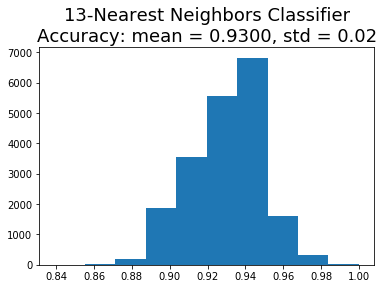

In [227]:
NeighborsClassifier = KNeighborsClassifier(n_neighbors=13)
neighbor_accuracies = []

for j in range(20000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    NeighborsClassifier.fit(X_train, y_train)
    y_pred = NeighborsClassifier.predict(X_test)
    accuracy = np.sum(y_test == y_pred)
    neighbor_accuracies.append(accuracy/len(X_test))
    
plt.title(f"13-Nearest Neighbors Classifier\nAccuracy: mean = {np.mean(neighbor_accuracies):.4f}, std = {np.std(neighbor_accuracies):.2f}", fontsize=18)
plt.hist(neighbor_accuracies, bins=10)
plt.show()

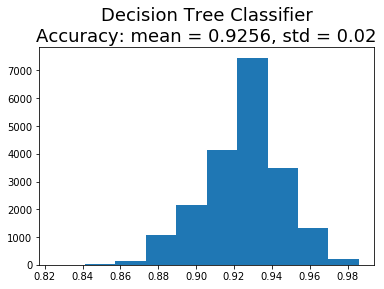

In [228]:
TreeClassifier = DecisionTreeClassifier()
tree_accuracies = []
for j in range(20000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    TreeClassifier.fit(X_train, y_train)
    y_pred = TreeClassifier.predict(X_test)
    accuracy = np.sum(y_test == y_pred)
    tree_accuracies.append(accuracy/len(X_test))
    
plt.title(f"Decision Tree Classifier\nAccuracy: mean = {np.mean(tree_accuracies):.4f}, std = {np.std(tree_accuracies):.2f}", fontsize=18)
plt.hist(tree_accuracies, bins=10)
plt.show()
b = tree_accuracies

In [229]:
data = load_iris()
X = data.data
y = data.target

In [230]:
ks = range(1, 20)
scores = []
for k in ks:
    C = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(C, X, y, scoring="accuracy", cv=5).mean()
    scores.append(score)

k = ks[np.argmax(scores)]
print(k)

6


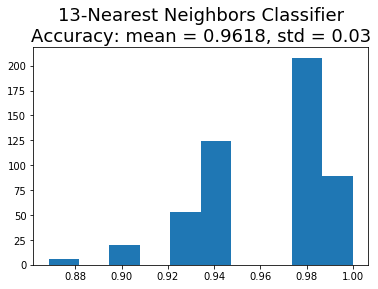

In [231]:
NeighborsClassifier = KNeighborsClassifier(n_neighbors=6)
neighbor_accuracies = []

for j in range(500):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    NeighborsClassifier.fit(X_train, y_train)
    y_pred = NeighborsClassifier.predict(X_test)
    accuracy = np.sum(y_test == y_pred)
    neighbor_accuracies.append(accuracy/len(X_test))
    
plt.title(f"13-Nearest Neighbors Classifier\nAccuracy: mean = {np.mean(neighbor_accuracies):.4f}, std = {np.std(neighbor_accuracies):.2f}", fontsize=18)
plt.hist(neighbor_accuracies, bins=10)
plt.show()

150


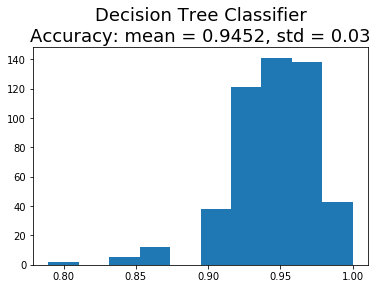

In [232]:
TreeClassifier = DecisionTreeClassifier()
print(len(X))
tree_accuracies = []
for j in range(500):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    TreeClassifier.fit(X_train, y_train)
    y_pred = TreeClassifier.predict(X_test)
    accuracy = np.sum(y_test == y_pred)
    tree_accuracies.append(accuracy/len(X_test))
    
plt.title(f"Decision Tree Classifier\nAccuracy: mean = {np.mean(tree_accuracies):.4f}, std = {np.std(tree_accuracies):.2f}", fontsize=18)
plt.hist(tree_accuracies, bins=10)
plt.show()
b = tree_accuracies

In [233]:
np.random.choice(range(len(X)), 10, replace=False)

array([ 70, 121,  47,   3,  24,  36,  82, 115,  97,  50])

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


Points never misclassified by DT: 9
Points never misclassified by 6-NN: 0
Points misclassified the same number of times by DT and 6-NN: 0
Points misclassified more often by DT: 25
Points misclassified more often by 6-NN: 125


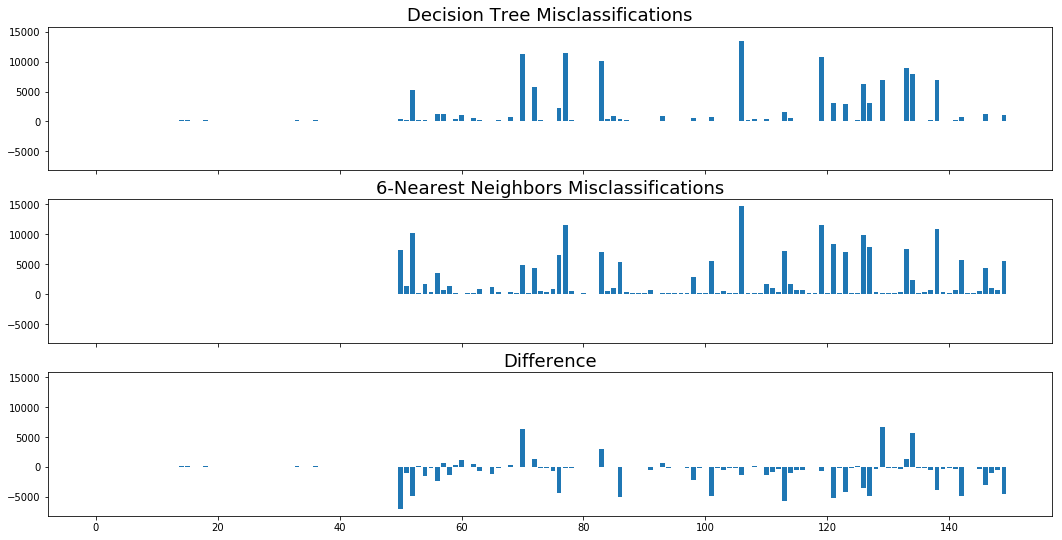

In [234]:
data = load_iris()
X = data.data
y = data.target

TreeClassifier = DecisionTreeClassifier()
NeighborsClassifier = KNeighborsClassifier(n_neighbors=13)
test_size = 0.25
n = len(X)
tree_misclass = np.zeros(n)
neighbors_misclass = np.zeros(n)
rng = np.array(range(n))
for j in range(20000):
    I = np.random.choice(rng, np.round(test_size*n).astype(int), replace=False)
    J = rng[np.in1d(rng, I, invert=True)]
    X_train, X_test, y_train, y_test = X[I], X[J], y[I], y[J]
    TreeClassifier.fit(X_train, y_train)
    NeighborsClassifier.fit(X_train, y_train)
    y_pred_tree = TreeClassifier.predict(X_test)
    y_pred_neighbors = NeighborsClassifier.predict(X_test)
    tree_misclass[J] = tree_misclass[J] + (y_pred_tree != y_test)
    neighbors_misclass[J] = neighbors_misclass[J] + (y_pred_neighbors != y_test)

f, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, sharey=True, figsize=(18, 9))
ax1.set_title("Decision Tree Misclassifications", fontsize=18)
ax2.set_title("6-Nearest Neighbors Misclassifications", fontsize=18)
ax3.set_title("Difference", fontsize=18)
ax1.bar(rng, tree_misclass)
ax2.bar(rng, neighbors_misclass)
ax3.bar(rng, tree_misclass - neighbors_misclass)

f.show()

print(f"Points never misclassified by DT: {sum(tree_misclass == 0)}")
print(f"Points never misclassified by 6-NN: {sum(neighbors_misclass == 0)}")
print(f"Points misclassified the same number of times by DT and 6-NN: {sum(tree_misclass == neighbors_misclass)}")
print(f"Points misclassified more often by DT: {sum(tree_misclass > neighbors_misclass)}")
print(f"Points misclassified more often by 6-NN: {sum(tree_misclass < neighbors_misclass)}")

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


Points never misclassified by DT: 74
Points never misclassified by 6-NN: 427
Points misclassified the same number of times by DT and 13-NN: 74
Points misclassified more often by DT: 420
Points misclassified more often by 6-NN: 75


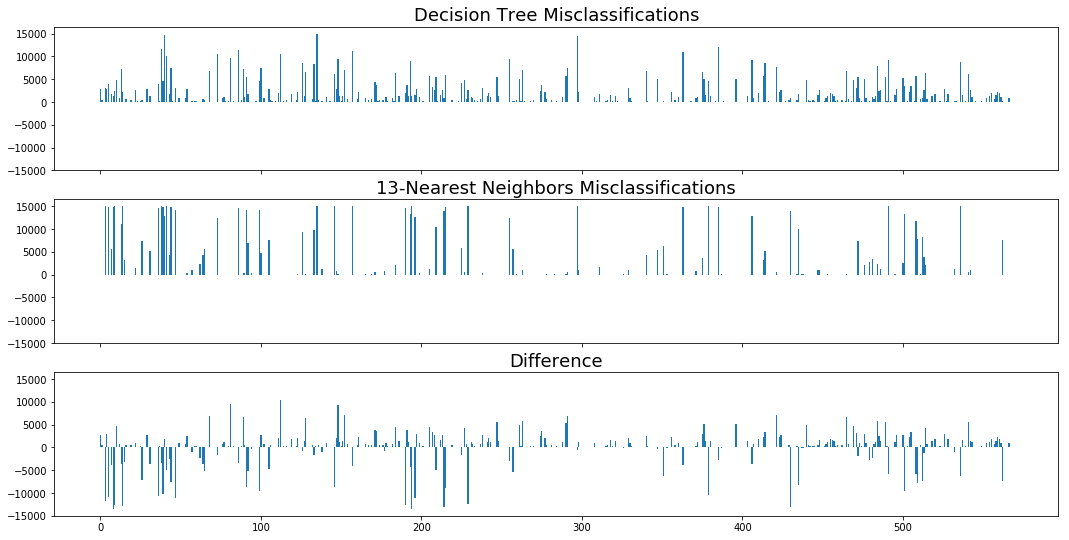

In [235]:
data = load_breast_cancer()
X = data.data
y = data.target

TreeClassifier = DecisionTreeClassifier()
NeighborsClassifier = KNeighborsClassifier(n_neighbors=13)
test_size = 0.25
n = len(X)
tree_misclass = np.zeros(n)
neighbors_misclass = np.zeros(n)
rng = np.array(range(n))
for j in range(20000):
    I = np.random.choice(rng, np.round(test_size*n).astype(int), replace=False)
    J = rng[np.in1d(rng, I, invert=True)]
    X_train, X_test, y_train, y_test = X[I], X[J], y[I], y[J]
    TreeClassifier.fit(X_train, y_train)
    NeighborsClassifier.fit(X_train, y_train)
    y_pred_tree = TreeClassifier.predict(X_test)
    y_pred_neighbors = NeighborsClassifier.predict(X_test)
    tree_misclass[J] = tree_misclass[J] + (y_pred_tree != y_test)
    neighbors_misclass[J] = neighbors_misclass[J] + (y_pred_neighbors != y_test)

f, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, sharey=True, figsize=(18, 9))
ax1.set_title("Decision Tree Misclassifications", fontsize=18)
ax2.set_title("13-Nearest Neighbors Misclassifications", fontsize=18)
ax3.set_title("Difference", fontsize=18)
ax1.bar(rng, tree_misclass)
ax2.bar(rng, neighbors_misclass)
ax3.bar(rng, tree_misclass - neighbors_misclass)

f.show()

print(f"Points never misclassified by DT: {sum(tree_misclass == 0)}")
print(f"Points never misclassified by 6-NN: {sum(neighbors_misclass == 0)}")
print(f"Points misclassified the same number of times by DT and 13-NN: {sum(tree_misclass == neighbors_misclass)}")
print(f"Points misclassified more often by DT: {sum(tree_misclass > neighbors_misclass)}")
print(f"Points misclassified more often by 6-NN: {sum(tree_misclass < neighbors_misclass)}")

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


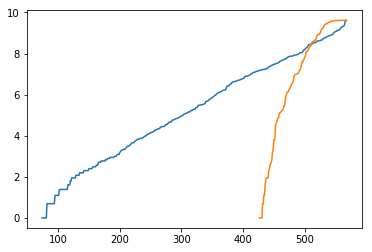

In [236]:
plt.plot(rng, np.log(np.sort(tree_misclass)))
plt.plot(rng, np.log(np.sort(neighbors_misclass)))
plt.show()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


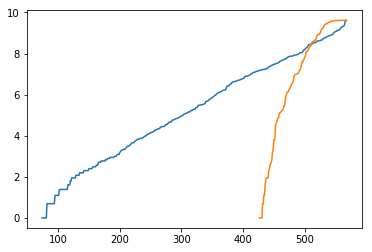

In [237]:
plt.plot(rng, np.log(np.sort(tree_misclass)))
plt.plot(rng, np.log(np.sort(neighbors_misclass)))
plt.show()